In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
titanic = pd.read_csv('./titanic_train.csv')

In [251]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [252]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [253]:
# 拿到数据先处理缺失数据.
# 能删则删, 不能删则填. 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [254]:
titanic['Age'].median()

np.float64(28.0)

In [255]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [256]:
titanic['Age'].fillna(value=titanic['Age'].median(),inplace=True)

In [257]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [258]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [259]:
titanic.drop(columns='Cabin',inplace=True)

In [260]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [261]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [262]:
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [263]:
titanic.fillna(value={'Embarked': 'S'}, inplace=True)

In [264]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [265]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [277]:
titanic['Sex']=titanic['Sex'].map({'male':1,'female':0})

In [267]:
titanic['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [292]:
titanic['Embarked']=titanic['Embarked'].map({'S':1,'C':0,'Q':2})

In [269]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [294]:
titanic.drop(columns=['Name','Ticket'],inplace=True)
titanic = pd.get_dummies(titanic)

In [271]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,1
887,888,1,1,0,19.0,0,0,30.0000,1
888,889,0,3,0,28.0,1,2,23.4500,1
889,890,1,1,1,26.0,0,0,30.0000,0


In [165]:
# 获取数据: 三个来源, 1. 公司提供, 2, 爬虫爬取, 3. 三方购买. 
# 数据清洗: 缺失值, 数据类型
# EDA: exploratory data analysis 探索性数据分析. 

In [166]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

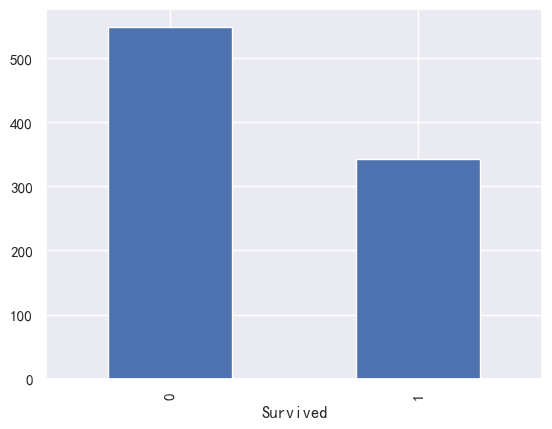

In [167]:
titanic.Survived.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

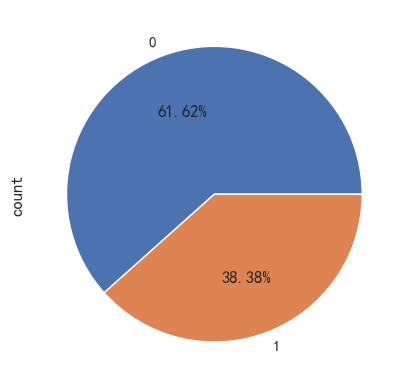

In [168]:
titanic.Survived.value_counts().plot(kind='pie',autopct='%.2f%%')

In [169]:
# 画一个热力图, 用来查看各个特征和特征之间的关系, 特征和标记之间的相关性
corr = titanic.corr()

In [170]:
mask=np.triu(np.ones_like(corr,dtype=bool))

<Axes: >

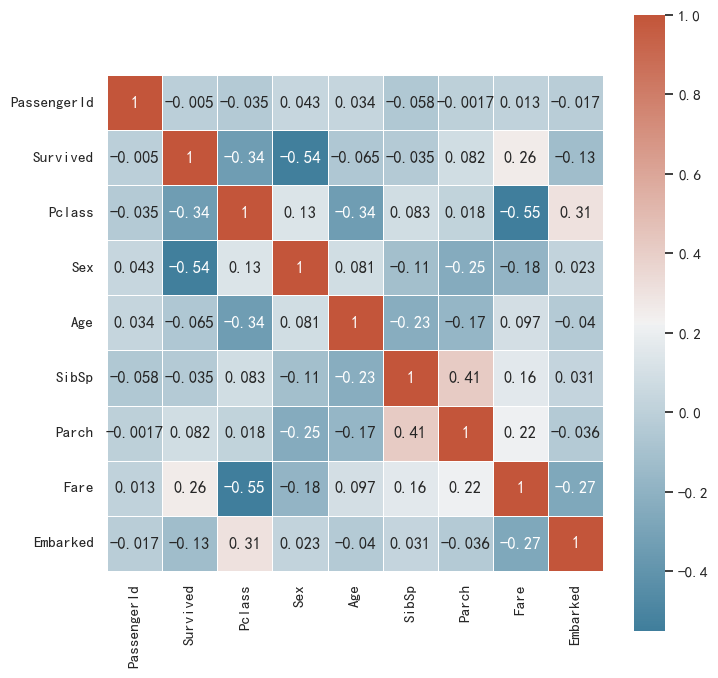

In [171]:
plt.figure(figsize=(8,8))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(titanic.corr(),annot=True,square=True,linewidths=0.5,cmap=cmap)

In [172]:
# Pclass和Fare有很强的负相关
# 性别和Pclass, Fare,和Survived都有很强的相关性. 

In [173]:
titanic.Sex.value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

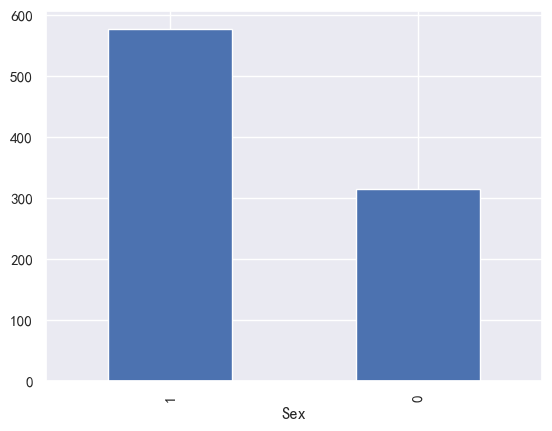

In [174]:
titanic.Sex.value_counts().plot(kind='bar')

In [175]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

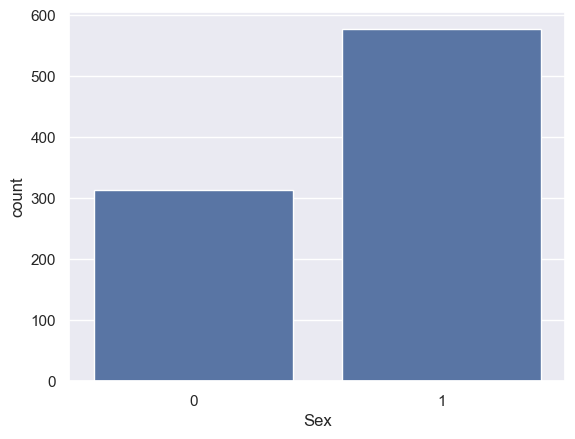

In [176]:
sns.countplot(x='Sex',data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

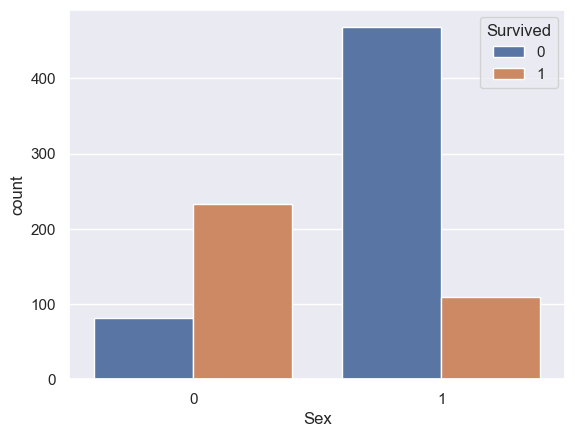

In [177]:
sns.countplot(x='Sex',data=titanic,hue='Survived')

In [178]:
# 可以观察到, 男性中, 生还的人比较少, 女性生还人数比较多. 

<Axes: xlabel='Pclass', ylabel='count'>

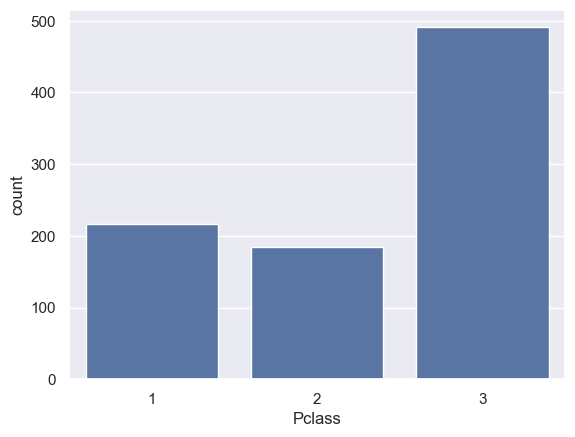

In [179]:
sns.countplot(x='Pclass',data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

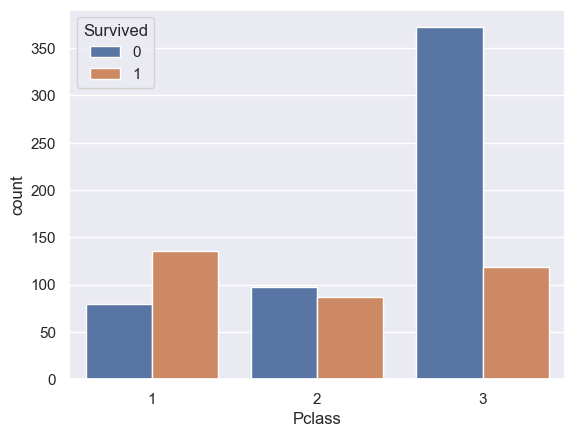

In [180]:
sns.countplot(x='Pclass',data=titanic,hue='Survived')

Text(0.5, 1.0, 'female')

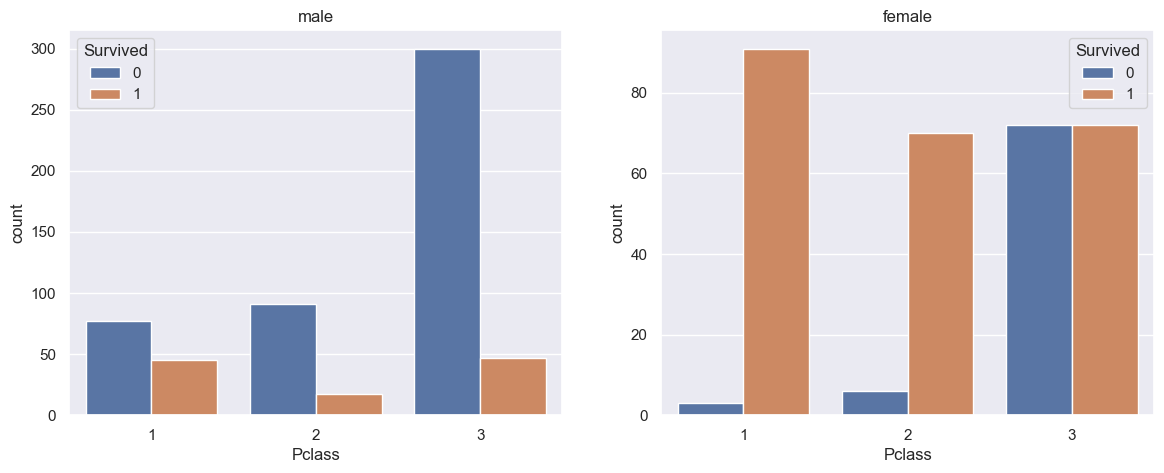

In [181]:
# 结合船舱和性别, 一起分析. 
# 看看不同船舱等级下, 男女生还情况. 
plt.figure(figsize=(2*7,1*5))
axes1=plt.subplot(1,2,1)
male=titanic.loc[titanic.Sex==1]
sns.countplot(x='Pclass',data=male,hue='Survived',ax=axes1)
axes1.set_title('male')

axes2=plt.subplot(1,2,2)
female=titanic.loc[titanic.Sex==0]
sns.countplot(x='Pclass',data=female,hue='Survived',ax=axes2)
axes2.set_title('female')

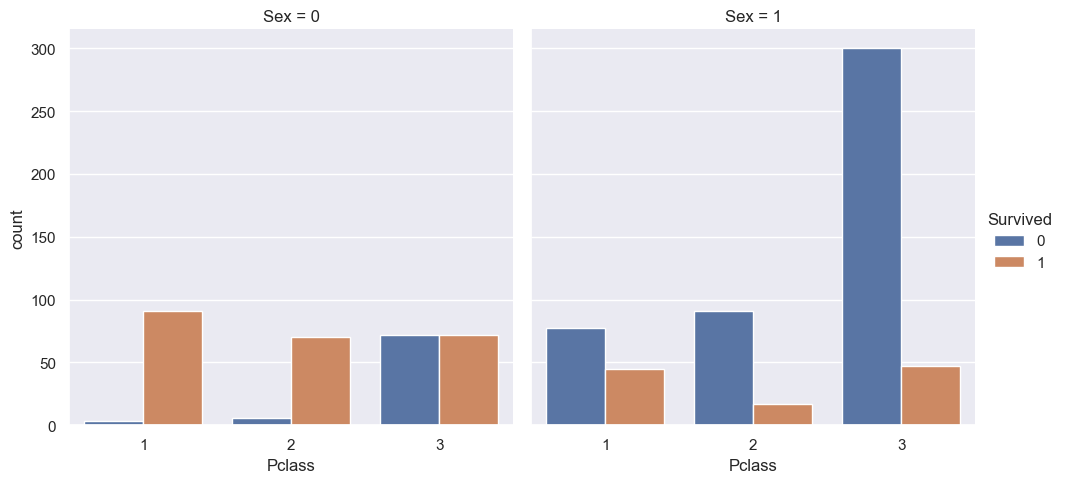

In [182]:
sns.catplot(x='Pclass',hue='Survived',col='Sex',data=titanic,kind='count')

In [183]:
# 前面的都是离散型数据. 
# 分析一下Fare 这样的连续型数据. 

In [184]:
titanic.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

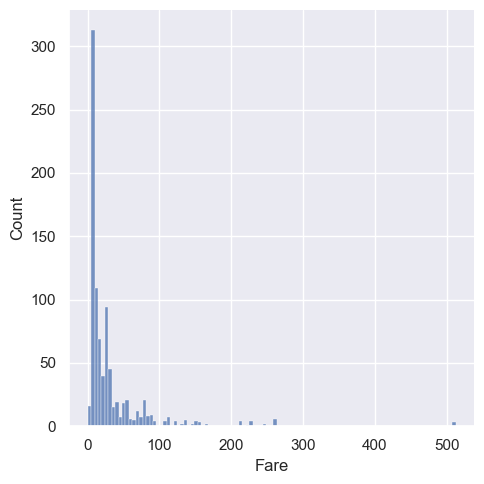

In [185]:
# 连续型的特征, 咱们可以看特征的分布情况. 画直方图
sns.displot(data=titanic,x='Fare')

In [186]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.897868
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.514624
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [187]:
titanic.Fare.quantile(q=0.8)

np.float64(39.6875)

<Axes: xlabel='Fare', ylabel='Count'>

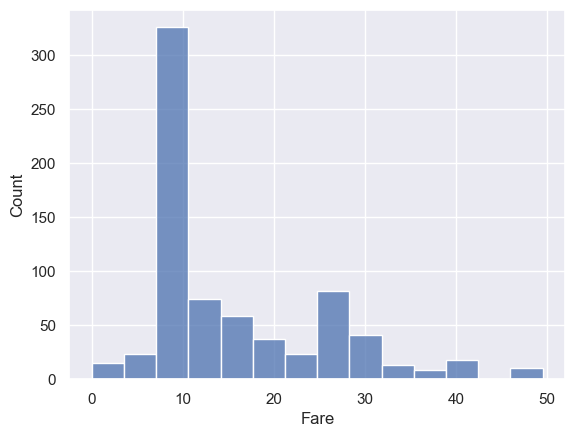

In [188]:
sns.histplot(data=titanic.loc[titanic.Fare<50],x='Fare')

In [189]:
# 把连续型的数据, 转化成离散型的数据进行分析. 
# 对连续型数据进行分区. 
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 550]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80','80-90', '90-100', '100-150', '150-200', '200-250', '250-550']
titanic['船票价格区间']=pd.cut(titanic['Fare'],bins=bins,labels=labels)

In [190]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,船票价格区间
0,1,0,3,1,22.0,1,0,7.2500,1,0-10
1,2,1,1,0,38.0,1,0,71.2833,0,70-80
2,3,1,3,0,26.0,0,0,7.9250,1,0-10
3,4,1,1,0,35.0,1,0,53.1000,1,50-60
4,5,0,3,1,35.0,0,0,8.0500,1,0-10


In [191]:
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

<Axes: xlabel='船票价格区间', ylabel='count'>

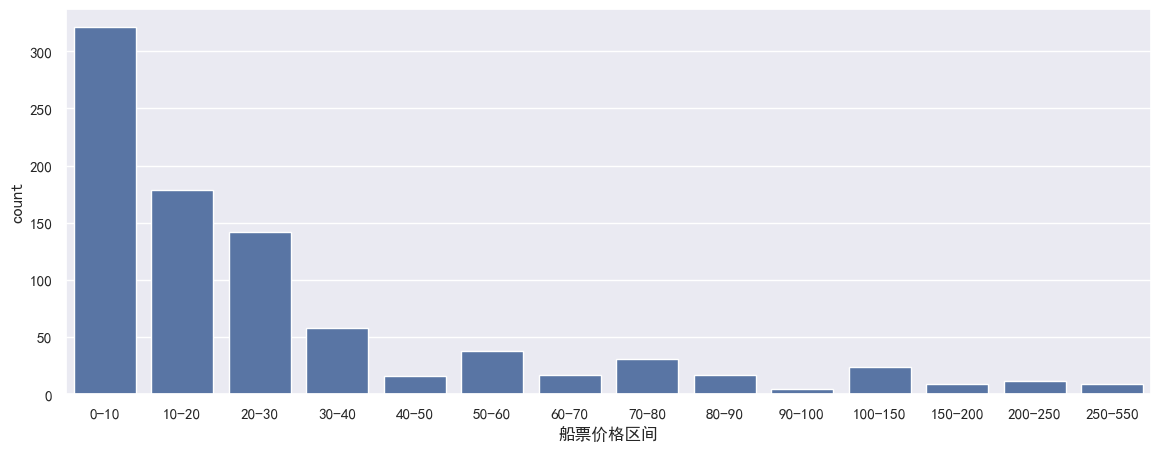

In [192]:
plt.figure(figsize=(14,5))
sns.countplot(x='船票价格区间',data=titanic)

<Axes: xlabel='船票价格区间', ylabel='count'>

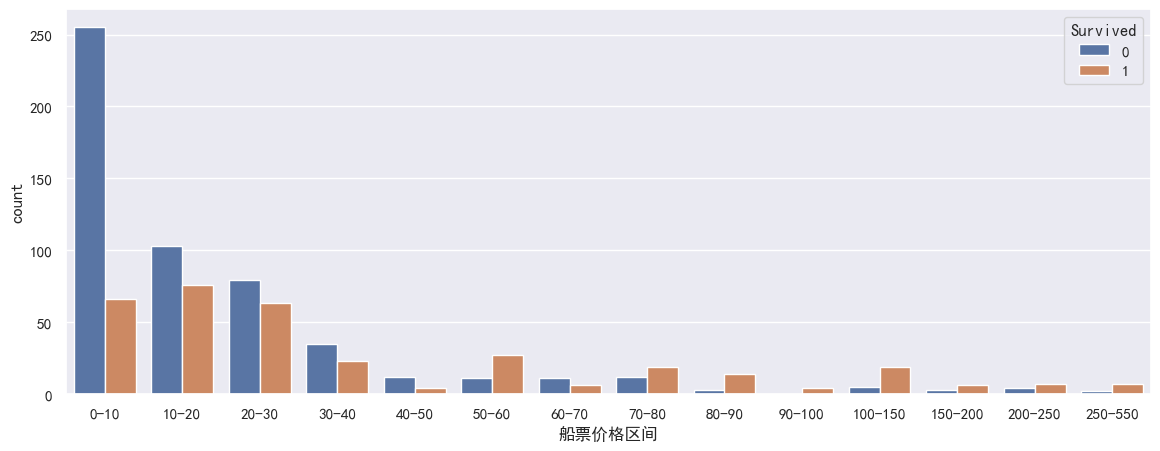

In [193]:
plt.figure(figsize=(14,5))
sns.countplot(x='船票价格区间',data=titanic,hue='Survived')

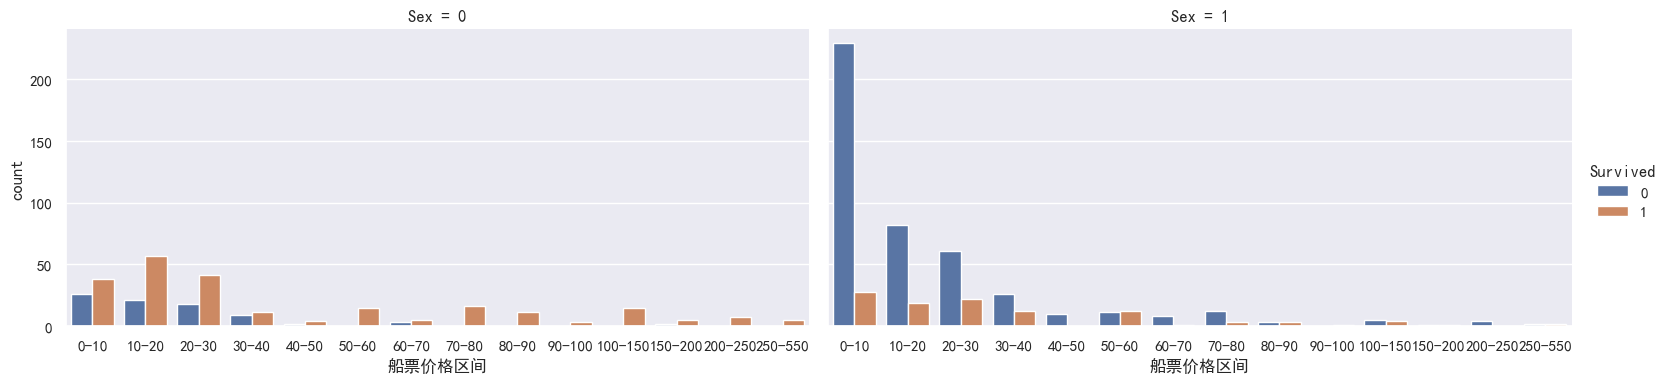

In [194]:
#绘制分类图
sns.catplot(x='船票价格区间',kind='count',hue='Survived',data=titanic,col='Sex',aspect=2,height=4)

In [195]:
# 这是个分类问题, 显而易见. 
# 问: 回归可以做吗
# 尝试用回归去做这个分类任务

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', '船票价格区间'],
      dtype='object')

In [198]:
titanic[np.array(['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked'])]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1
887,1,0,19.0,0,0,30.0000,1
888,3,0,28.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,0


In [199]:
features = np.array(['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked'])
data = titanic[features].values.copy()
target = titanic.Survived.values
target

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train,X_test,y_train,y_test = train_test_split(data,target)

In [202]:
linear= LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [203]:
y_=linear.predict(X_test)

In [204]:
# 如何把回归的结果变成分类的结果
# 设定阈值, 根据阈值进行分类
y_

array([ 0.30778733,  0.54255097,  0.55383283,  0.44811341,  0.62790617,
        0.25964771,  1.01600965,  0.05037475,  0.20793843,  0.7562197 ,
        0.0845086 ,  0.14126167,  0.04666072,  0.14025382,  0.0812653 ,
        0.01790743,  0.38075856,  0.64354955,  0.45507233,  0.60335174,
        0.5352464 ,  0.61627888,  0.46373536,  0.29711508,  0.35217713,
        0.6666744 ,  0.3716348 ,  0.64373599, -0.00394753,  0.10842243,
        0.95715254,  0.1428179 ,  0.4694921 , -0.21192405,  0.95973788,
       -0.0258025 ,  0.45476156,  0.10150581,  0.30256375,  0.07937893,
        0.25244854,  0.79690725,  0.19410616,  0.09458139,  0.89770961,
        0.41804449,  1.02942551,  0.62446932,  0.07586604,  0.20980285,
        0.45915927,  0.07960418,  0.23447283,  0.26840163,  0.15146406,
        0.10398391,  0.16803863,  1.0078153 ,  0.5246857 ,  0.06834891,
        0.61056045,  0.29756929,  0.02427075,  0.74514306,  0.29079626,
        0.6033564 ,  0.09431727,  0.01850405,  0.00302829,  0.03

In [205]:
y_pred=(y_>=0.6)

In [206]:
y_pred

array([False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,

In [207]:
(y_test==y_pred).mean()

np.float64(0.8385650224215246)

In [208]:
# 分类和回归并没有那么清晰的界限. 
# 用交叉验证来尽量消除切割数据带来的影响

In [209]:
from sklearn.model_selection import StratifiedKFold

In [210]:
skf=StratifiedKFold()

In [211]:
accs=[]
for train,test in skf.split(data,target):
    X_train=data[train]
    y_train=target[train]
    X_test=data[test]
    y_test=target[test]
    linear=LinearRegression()
    linear.fit(X_train,y_train)
    y_=linear.predict(X_test)
    y_pred=(y_>=0.6)
    acc=(y_pred==y_test).mean()
    print(acc)
    accs.append(acc)
print('平均准确率:',np.array(accs).mean())

0.7821229050279329
0.7921348314606742
0.8089887640449438
0.7752808988764045
0.8146067415730337
平均准确率: 0.7946268281965978


In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
from sklearn.model_selection import cross_val_score

In [214]:
cross_val_score(LogisticRegression(max_iter=1000),data,target).mean()

np.float64(0.7833971502102819)

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
cross_val_score(RandomForestClassifier(max_depth=3),data,target).mean()

np.float64(0.809277509258678)

In [217]:
from sklearn.svm import SVC

In [218]:
cross_val_score(SVC(),data,target).mean()

np.float64(0.6734982110350888)

In [219]:
from sklearn.model_selection import GridSearchCV

In [220]:
svc=SVC()
param_grid={
    'C':[0.1,1,10],
    'gamma':[1/70,1/7,10/7],
    'kernel':['linear','rbf','poly']
}
gv=GridSearchCV(svc,param_grid,cv=5,verbose=2,n_jobs=-1)

In [221]:
#gv.fit(data,target)

In [222]:
# 算法已经到了瓶颈, 得分很难提高了. 怎么办?
# 决定算法表现好坏的因素不在于算法, 而在于数据. 
# 想办法在特征工程上做一些优化
# 特征工程:
#1. 特征选择
#2. 特征缩放
#3. 特征衍生: 从已有的特征中产生一些新的特征.

In [223]:
# 集成的树模型, 都有一个额外的功能, 完成训练之后可以得到特征的重要性. 
rfc=RandomForestClassifier()
rfc.fit(data,target)

RandomForestClassifier()

In [224]:
rfc.feature_importances_

array([0.08771056, 0.2608387 , 0.26087248, 0.04740816, 0.03645176,
       0.2723249 , 0.03439343])

In [225]:
features

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype='<U8')

In [226]:
# 返回排序之后的原始索引
np.argsort(rfc.feature_importances_)[::-1]

array([5, 2, 1, 0, 3, 4, 6])

In [227]:
def draw_feature_importances(x,importances):
    plt.figure(figsize=(8,5))
    plt.bar(np.arange(x),np.sort(importances)[::-1])
    _=plt.xticks(np.arange(x),features[np.argsort(importances)[::-1]])

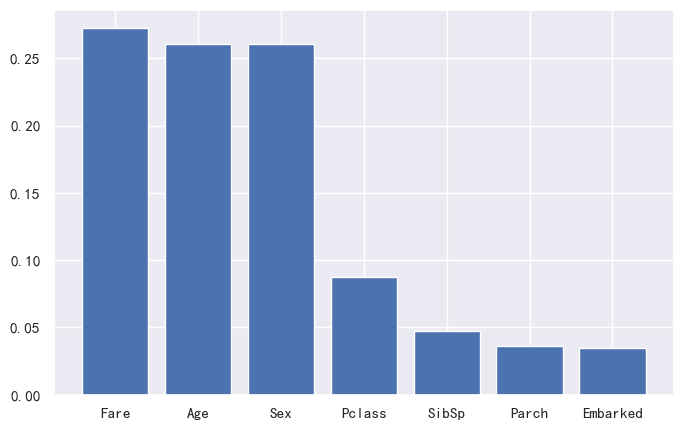

In [228]:
draw_feature_importances(7,rfc.feature_importances_)

In [229]:
#  随机森林认为Fare, Sex, Age比较重要. 

In [230]:
feature_rfc = np.array(['Fare','Sex','Age'])
data_rfc = titanic[feature_rfc].values.copy()
cross_val_score(LogisticRegression(max_iter=1000),data_rfc,target).mean()

np.float64(0.7822547234950725)

In [231]:
from sklearn.ensemble import GradientBoostingClassifier

In [232]:
gbdt = GradientBoostingClassifier()
gbdt.fit(data,target)

GradientBoostingClassifier()

In [233]:
gbdt.feature_importances_

array([0.15177791, 0.47196453, 0.12379761, 0.05576445, 0.00891093,
       0.17195209, 0.01583248])

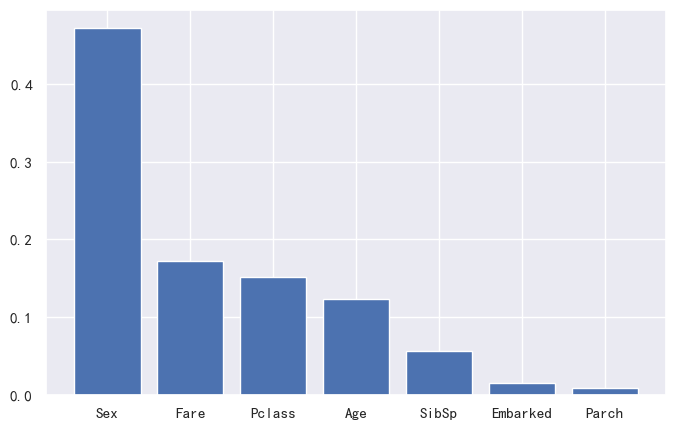

In [234]:
draw_feature_importances(7,gbdt.feature_importances_)

In [235]:
feature_rfc=np.array(['Fare','Sex','Age','Pclass'])
data_rfc = titanic[feature_rfc].values.copy()
cross_val_score(LogisticRegression(max_iter=1000),data_rfc,target).mean()

np.float64(0.7867553825874082)

In [236]:
from sklearn.feature_selection import SelectKBest

In [237]:
skb = SelectKBest(k=7)

In [238]:
skb.fit(data,target)

SelectKBest(k=7)

In [239]:
skb.scores_

array([115.03127219, 372.4057236 ,   3.76152805,   1.1105722 ,
         5.96346384,  63.03076423,  14.330525  ])

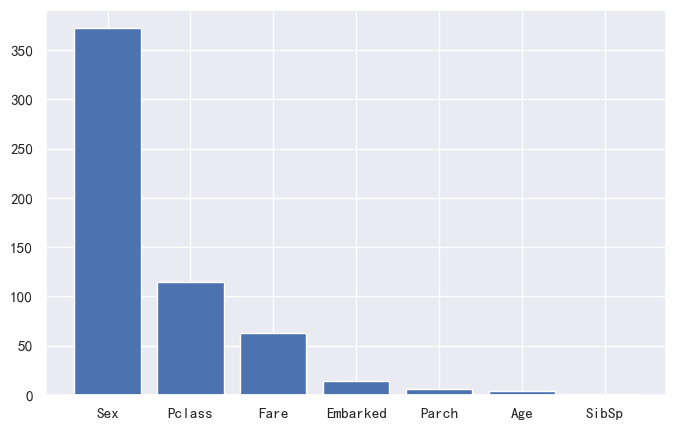

In [240]:
draw_feature_importances(7,skb.scores_)

In [241]:
feature_rfc = np.array(['Fare','Sex','Pclass'])
data_rfc = titanic[feature_rfc].values.copy()
cross_val_score(LogisticRegression(max_iter=1000),data_rfc,target).mean()

np.float64(0.7822547234950725)

In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
scaler=StandardScaler()
data_scaled = scaler.fit_transform(data)

In [244]:
cross_val_score(LogisticRegression(max_iter=1000),data_scaled,target).mean()

np.float64(0.7833971502102819)

In [245]:
# 特征衍生: 一般用于特征不多的情况, 根据已有的特征, 衍生出新的特征. 要求对业务和特征有比较深刻的理解. 

In [246]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,船票价格区间
0,1,0,3,1,22.0,1,0,7.2500,1,0-10
1,2,1,1,0,38.0,1,0,71.2833,0,70-80
2,3,1,3,0,26.0,0,0,7.9250,1,0-10
3,4,1,1,0,35.0,1,0,53.1000,1,50-60
4,5,0,3,1,35.0,0,0,8.0500,1,0-10
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,1,10-20
887,888,1,1,0,19.0,0,0,30.0000,1,20-30
888,889,0,3,0,28.0,1,2,23.4500,1,20-30
889,890,1,1,1,26.0,0,0,30.0000,0,20-30


In [278]:
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']

In [274]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,1,1
1,2,1,1,0,38.0,1,0,71.2833,0,1
2,3,1,3,0,26.0,0,0,7.9250,1,0
3,4,1,1,0,35.0,1,0,53.1000,1,1
4,5,0,3,1,35.0,0,0,8.0500,1,0


In [279]:
titanic['NameLength'] = titanic['Name'].map(lambda name:len(name))

In [280]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,51
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,44
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,21
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,40
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,0,21


In [281]:
#Braund, Mr. Owen Harris
#Heikkinen, Miss. Laina
#Allen, Mr. William Henry

In [282]:
import re

In [283]:
# .*?	非贪婪匹配任意字符（.匹配任意字符，*表示 0 次或多次，?表示尽可能少匹配）。
# ,	匹配逗号（姓名中姓氏与头衔的分隔符）。
# \s	匹配空白字符（逗号后的空格）。
# (.*?)	捕获组（用括号标记），非贪婪匹配任意字符，用于提取目标内容（头衔）。
# \.	匹配句号（\.转义，因为.在正则中是特殊字符），头衔后的句号。
# \s.*	匹配句号后的空格及剩余所有字符（姓名的其余部分）。
name = 'Allen, Mr. William Henry'
re.match(r'.*?,\s(.*?)\.\s.*',name).group(1)

'Mr'

In [284]:
titanic['Title']=titanic['Name'].map(lambda name:re.match(r'.*?,\s(.*?)\.\s.*',name).group(1))

In [285]:
# col 上校, rev 牧师 Mlle 法国小姐, Major陆军少校
#Sir爵士, Capt上尉, Countess女伯爵, Jonkheer无名贵族,
#Don阁下, 尊称, Mme夫人..Dona

In [286]:
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [287]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "the Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

In [288]:
titanic['Title']=titanic['Title'].map(title_mapping)

In [289]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'NameLength', 'Title'],
      dtype='object')

In [290]:
#使用新老特征进行训练
feature_new = np.array(['Pclass',  'Sex', 'Age',   'Fare', 'Embarked',  'FamilySize', 'NameLength', 'Title'])
data_new = titanic[feature_new]

In [296]:
#cross_val_score(LogisticRegression(max_iter=1000), data_new, target).mean()